In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
sns.set(rc={'figure.figsize':(8,6)})
import matplotlib.pyplot as plt #data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [4]:
#read the dataset
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [8]:
#show the first and last 10 observations
df.head(-10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [6]:
# shows the number of observations (row) and variables (columns)
df.shape

(150, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Bu, dataframe'in bellek kullanımı, sütunların adları, veri tipleri ve eksik değerlerin sayısı vb. bilgileri içerir. Ayrıca her bir sütundaki benzersiz olmayan değerlerin sayısını da gösterir. ** This includes dataframe's memory usage, names of columns, data types and number of missing values, etc. Contains information. It also shows the number of non-unique values in each column.

In [17]:
# transposed
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [19]:
df.isnull().sum() # how many missing values in this data set's columns?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
print(df["species"].unique()) # how many unique values in "species" variable?

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

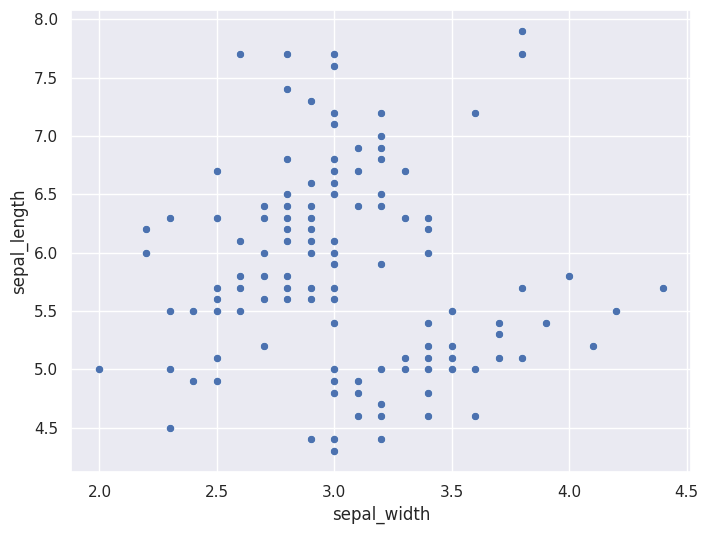

In [28]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=df)


scatterplot, bir nokta grafiğidir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


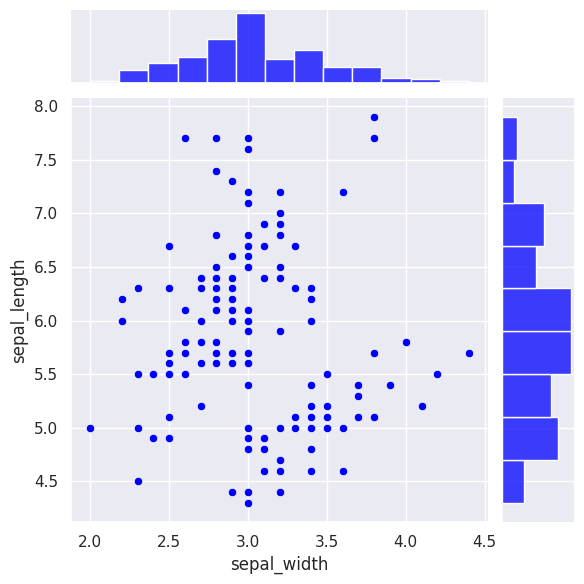

In [31]:
sns.jointplot(x="sepal_width", y="sepal_length", data=df, color="blue")

jointplot, bir scatterplot ve her bir değişkenin dağılımını gösteren histogramların birleşimidir.

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

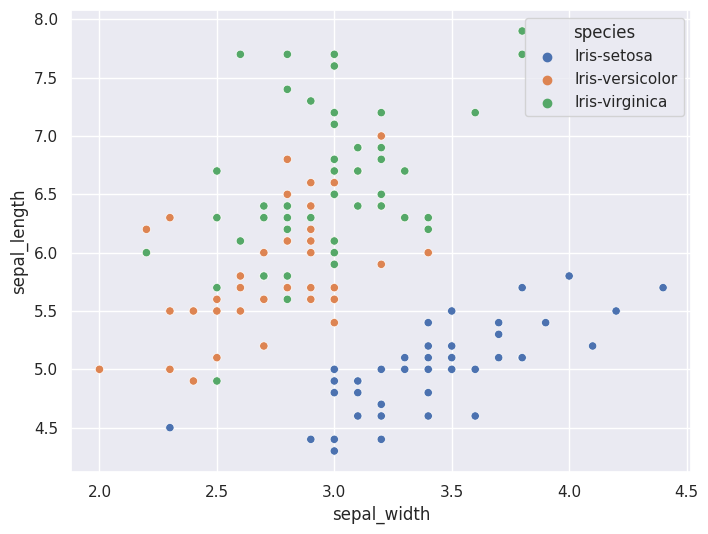

In [32]:
sns.scatterplot(x="sepal_width", y="sepal_length", hue="species", data=df) # species kolonu için nokta (scatter) grafiği

hue="species" diye kolon belirttik, tür ayrımı yapıldı ve her farklı gözlem değeri için farklı renk kullanıldı.

In [34]:
df["species"].value_counts() # how many observations in each variable?

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: ylabel='sepal_width'>

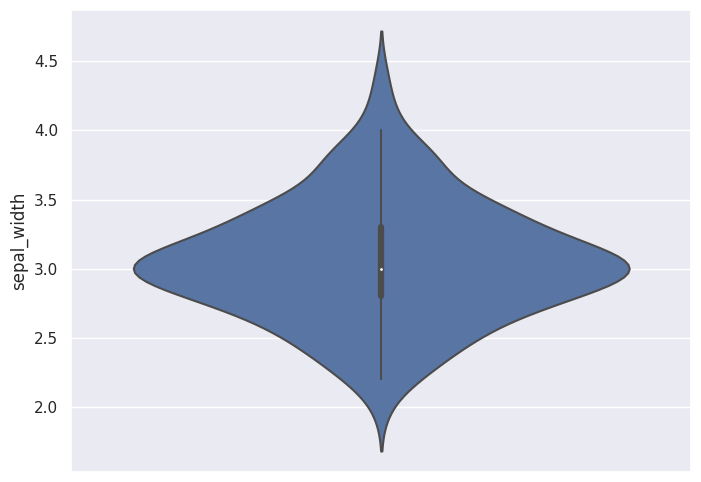

In [35]:
sns.violinplot(y="sepal_width", data=df)

keman grafik. ortalama değer 3. ortalama değeri beyaz nokta verir.

/tmp/ipykernel_33/1980218913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_width"], bins=16, color="green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Density'>

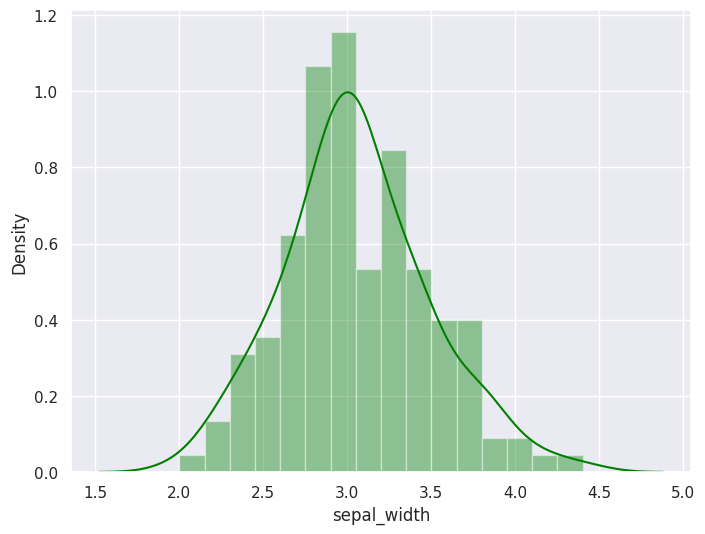

In [41]:
sns.distplot(df["sepal_width"], bins=16, color="green")

distplot yöntemi seaborn'un ilerleyen sürümlerinde kaldırılacak. alternatif olarak histplot/displot kullanabiliriz. ** distplot is gonna remove in the next versions of seaborn lib. we can use histplot/displot alternatively.

<Axes: xlabel='species', ylabel='sepal_length'>

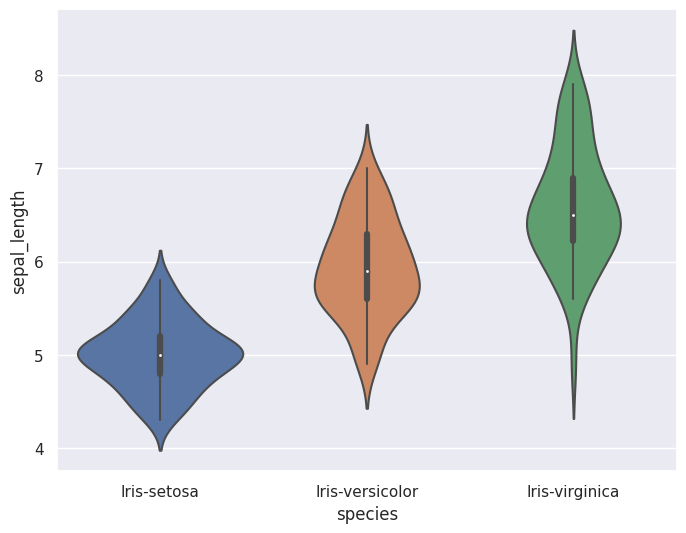

In [45]:
sns.violinplot(x="species", y="sepal_length", data=df)

species değişkeni içindeki gözlem değerlerinin çanak yaprak uzunluğunun violinplot yöntemiyle görselleştirilmesi. iris-setosa ortalaması 5, iris-versicolor ortalaması neredeyse 6, iris-virginica ortalaması ise 6.5 civarlarında.

<Axes: xlabel='species', ylabel='count'>

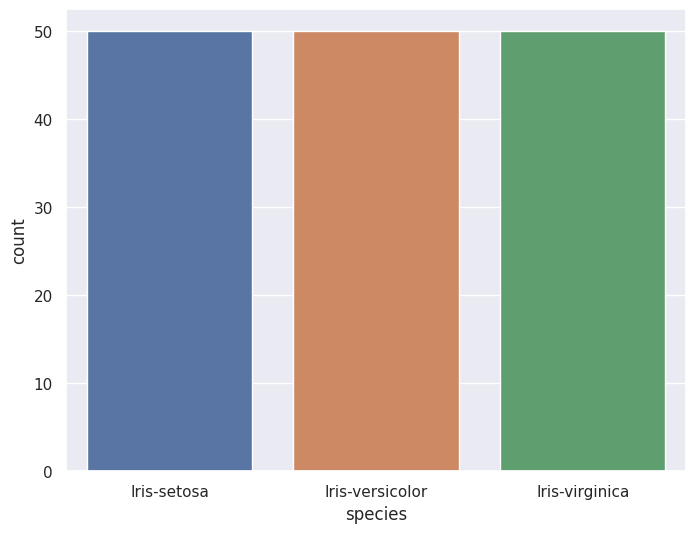

In [46]:
sns.countplot(x="species", data=df)

In [63]:
df[(df["sepal_length"]>5.5) & (df["species"]=="Iris-setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


sepal_length'i 5.5'ten büyük olan ve türü iris-setosa olanları seçtik.

In [74]:
df[((df["sepal_length"]>6.5) & ~(df["species"]=="Iris-virginica"))]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor


sepal_length'i 6.5'ten büyük olan ve türü iris-virginica **olmayanları** (tilda ~ ile) seçtik.

In [75]:
df.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


species değişkeni altındaki her bir gözlemin kolonları için ortalama bulduk.

In [76]:
df.groupby(["species"])[["petal_length"]].std()

,petal_length
species,
Iris-setosa,0.173511
Iris-versicolor,0.469911
Iris-virginica,0.551895


yine species değişkeni altındaki her bir gözlemin petal_length kolonunun **standart sapmasını** bulduk.